In [18]:
import pandas as pd
df = pd.read_csv("../data/raw/data.csv")
df = df.drop_duplicates()
df = df.dropna(subset=["Age","Month","City","Time","Total_Purchases","Product_Category","Amount"])
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Time'] = pd.to_timedelta(df['Time']).dt.total_seconds()


In [19]:
features = ["Age","Month","City","Time","Total_Purchases","Product_Category"]
X = df[features]
y = df["Amount"]


In [20]:
from sklearn.preprocessing import OneHotEncoder
X = pd.get_dummies(X, columns=["City","Product_Category"], drop_first=True)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


R2 Score: -0.04810364166526493
RMSE: 20978.307034320507


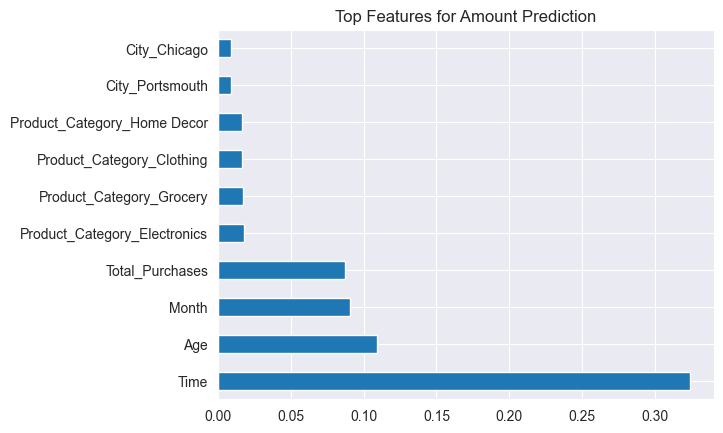

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances[:10].plot(kind="barh", title="Top Features for Amount Prediction")
plt.show()
